In [11]:
import requests, io
from PIL import Image

def get_audio_events(path, threshold=0.01, plot=False):
    # with open(path, 'rb') as f:
    audio = {'file': open(path, 'rb')}
    url = 'http://192.168.50.94:9012/detect_event'
    r = requests.post(url, files=audio, params={'threshold': threshold, 'plot': plot})
    assert r.status_code == 200, r.json()
    if plot:
        return Image.open(io.BytesIO(r.content))
    return r.json()

In [24]:
from glob import glob

files = glob(f'sample/SED_test/*.m4a', recursive=True)
get_audio_events(files[0], threshold=0.01, plot=False)

{'speak': 0.6205601062740167,
 'male': 0.7561325497646482,
 'female': 0.24386745023535178,
 'events': ['speak'],
 'file': '80525077.m4a',
 'threshold': 0.01,
 'detail': None}

In [23]:
import os, pandas as pd
results = []
for file in files:
    # file = os.path.join( os.getcwd(), file )
    result = get_audio_events(file, threshold=0.03, plot=False)
    results.append(result)
results = pd.DataFrame(results)
results.to_csv('sample/results.csv', index=False)
results.sort_values('file')

,speak,male,female,events,file,threshold
4,0.567452,0.968852,0.031148,[speak],74996611.m4a,0.03
9,0.591345,0.837549,0.162451,"[speak, Scissors]",80523766.m4a,0.03
10,0.603397,0.752873,0.247127,[speak],80524113.m4a,0.03
7,0.639012,0.541576,0.458424,"[Clicking, speak]",80524644.m4a,0.03
3,0.675059,0.450807,0.549193,[speak],80524702.m4a,0.03
8,0.614022,0.881758,0.118242,"[Single-lens reflex camera, speak]",80524757.m4a,0.03
0,0.620560,0.756133,0.243867,[speak],80525077.m4a,0.03
1,0.608728,0.788204,0.211796,[speak],81091410.m4a,0.03
6,0.529380,0.582756,0.417244,"[speak, Inside, small room]",81092895.m4a,0.03
5,0.598876,0.942463,0.057537,"[Inside, small room, speak]",81097528.m4a,0.03


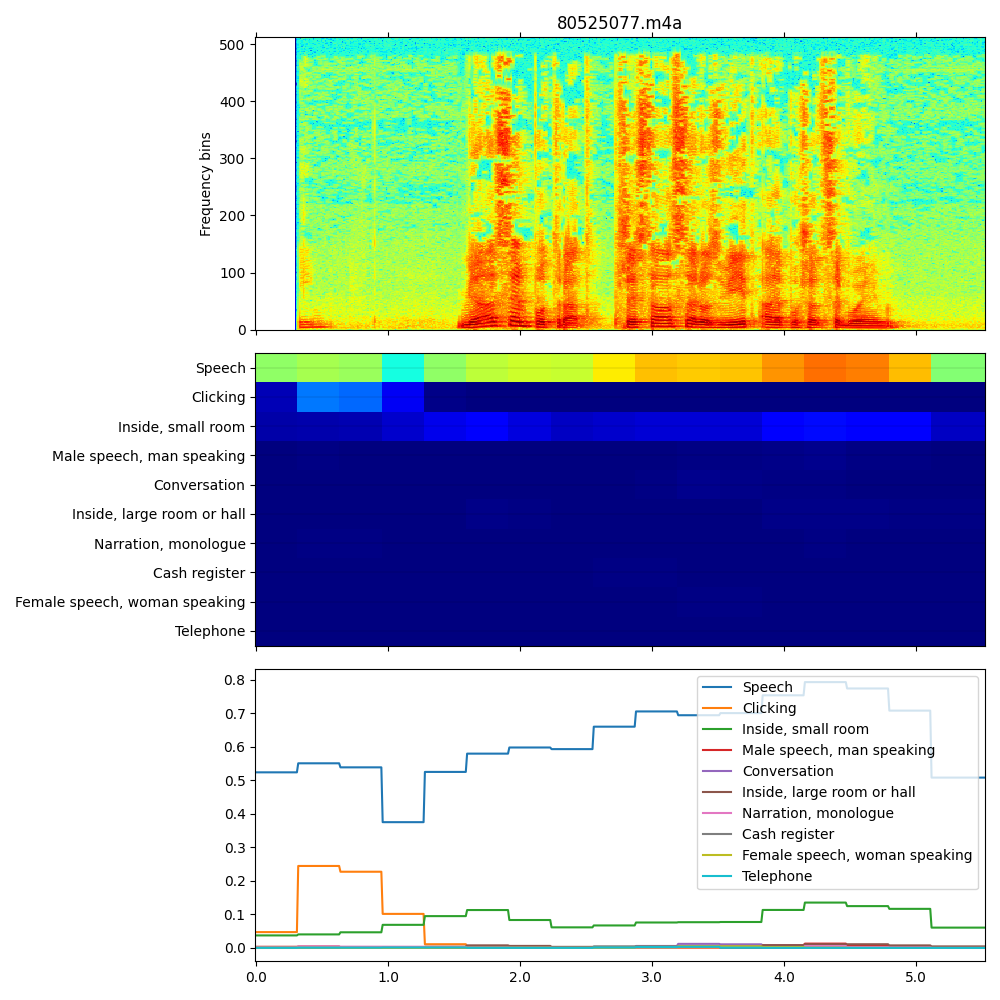

In [19]:
get_audio_events(files[0], plot=True)

In [20]:
for file in files:
    img = get_audio_events(file, plot=True)
    img.save(f'{file}.png')
